[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thomasmanke/ABS/blob/main/Notebooks/MarkovChains/MC_002_Properties.ipynb)

# Analysing Markov chain properties

## Preparations

Import Required Modules and Define Convenience Functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power



def generate_sequence(P, s=0, T=100):

  assert P.shape[0]==P.shape[1],         "generate_sequence: P should be a squared matrix"
  assert np.allclose( P.sum(axis=1), 1), "generate_sequence: P should be a stochastic matrix"

  ns = P.shape[0] # number of states
  L = [s]         # initial state

  # loop for T time steps
  for t in range(T):
    s = np.random.choice( ns, p = P[s, :] )
    L.append(s)
  return L

Let's make sure we start from the same model (transition probabilities)

In [ ]:
P = np.array(
    [[0.8, 0.2], 
     [0.1, 0.9]]
)
X=generate_sequence(P)
print(*X, sep='')

## Probability of a Sequence



The probability of an observed state sequence $X=(X_1, X_2, \ldots X_T)=X_{1:T}$ is an important quantity: 

$$
Pr(X|P) = Pr(X_1) Pr(X_2|X_1) Pr(X_3|X_2) \cdots Pr(X_T|X_{T-1})
$$

It may be used to classify a given observation $X$ as more or less likely to emerge from different models

$$
Pr(X|P_1) < Pr(X|P_2) 
$$

**Group Task (20 min)**: Strange coins

Your favorite casino seems to use very strange coins and you try 2 different Markov models to model the occurence of heads (0) and tails (1). The transition probabilities read 

$$
P_1 = \begin{bmatrix} 
0.2   &  0.8 \\ 
0.8   &  0.2 
\end{bmatrix} 
$$

\

$$
P_2 = \begin{bmatrix} 
0.8   &  0.2 \\ 
0.8   &  0.2 
\end{bmatrix} 
$$

You also assume that the initial probability for observing heads (0) or tails (1) is 50% in both cases.

1. Give a verbal account of the model and contrast this with a fair dice.
2. Complete the code block below to calculate the probability of the sequence $X=0010000011$ under your model. 
3. Can you calculate the probability for a fair dice analytically (with a simple formula)?
4. Exchange the results with the other group and decide which model is more likely.


In [8]:
#%%script echo Edit before executing
X = [0,0,1,0,0,0,0,0,1,1]
P2 = np.array([[0.8,0.2], [0.8,0.2]])
pfair = np.array([[0.5,0.5],[0.5,0.5]])

def probcal(Z,Seq):
  prob = 0.5                   # initial probability: P(x_1=0)
# loop over all edges in chain 
  for t in range(len(Seq)-1):
    x1= X[t]                  # current state
    x2= X[t+1]                  # next state
    prob = prob*Z[x1,x2]
  return prob          # probability update

    # you might want to print for debugging
    #print('t={}, x1={}, x2={} P[s1,s2]={}'.format(t,x1,x2, P[x1,x2]) )

print(probcal(P2,X))
print(probcal(pfair,X))

0.0010485760000000005
0.0009765625


**Follow up:** Duplicate (repeat) the sequence $X$ to obtain a new $X$ with twice the length?  What can you say about the probability?

**Messages**
- Markov Models are probabilistic models: given the transition matrix $P$ we can calculate many interesting probabilities
- More specifically: the probability of a given sequences. Decreases with sequence length - better use logs for long sequences!
- Two approaches: Mathematical Treatment of stochastic matrices vs Numerical Simulations (algorithmic efficiency)

## counting occurrences

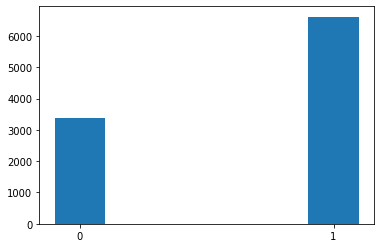

In [5]:
# define new transition matrix
P = np.array( [[0.8, 0.2], [0.1, 0.9]] )
np.random.seed(42)
X = generate_sequence(P, s=0, T=1)

states, counts = np.unique(X, return_counts=True)
B = plt.bar(states.astype(str), counts, align='center', width=0.2)

**Task (5 min):** 

Repeat the above plot for different initial states s and different length of sequences. 

What do you observe?

---


## Calculating higher order probabilities



A Markov Model is defined by all 1-step transition probabilities: $P_{ij}$ (for $i \to j$). 

What is the probability for transitions $i \to j$ in 2 steps, 3 steps, ...t-steps?

$$P_{ij}(t) = P(X_t = j | X_0 = i)$$

**Group task (15 min):**  Consider a specific case for the given $P$ above.
Starting at $t=0$ in *state i=0*, what are the probabilities at time $t$

Group 1:  to be in *state j=0*?

Group 2:  to be in *state j=1*?

In other words:  Group 1 $\to$ Calculate $P_{00}(t)$. Group 2 $\to$ Calculate $P_{01}(t)$.

a) at time t=1 ?
    
b) at time t=2 ?

**Hint:** Consider all paths that go from $i \to j$ 

In [6]:
#%%script echo Edit before executing

P = np.array(
    [[0.8, 0.2], 
     [0.1, 0.9]]

print(P[0,1])
print('P01(t=1):'+str(P[0,1]))
print('P01(t=2  1st:): '+str(P[0,0]*P[0,1]))
print('P01(t=2  2nd:): '+str(P[0,1]*P[1,1]))
print('P00(t=1): '+str(P[0,0])) 
print('P00(t=2) 1st : '+str(P[0,0]*P[0,0])) 
print('P00(t=2) snd : '+str(P[0,1]*P[1,0]))
print(p[0,1]*p[1,0]+*[p[0,0]])
print([[0,0]*p[0,1]+*p[0,1]*p[1,1]])



SyntaxError: ignored

For larger $t$, these calculations can fast become cumbersome ...

### Generalization and Simplification

Required Tools:
1. Matrix Multiplication: $C_{ij} = \sum_k A_{ik}B_{kj}$
2. Marginalization: $P(A) = \sum_B P(A|B) P(B)$

1. **Initialization:**  $P_{ij}(t=0) = \delta_{ij}$
2. **1-step probabilties:**  $P_{ij}(t=1) = P_{ij}$  (Definition of Markov Chain)
3. **Recursion:** (marginalization over all states at time $t$)

$$
\begin{align}
 Pr(X_{t+1}=j|X_0=i) &= \sum_k Pr(X_{t+1}=j | X_t=k, X_0=i) \cdot Pr(X_t=k|X_0=i) \\ 
 &= \sum_k Pr(X_{t+1}=j | X_t=k) \cdot Pr(X_t=k|X_0=i) \\ 
 P_{ij}(t+1) &= \sum_k P_{kj} \cdot P_{ik}(t) = (P^t)_{ij}
 \end{align}
 $$


$\sum_k$ is the sum over all connections from state $k$ to $j$, and $p_{ik}(t)$ is the previous result over all possible pathways from $i$ to $k$ 

The above is for the t-step transition matrix. 
For the probability distribution over states we have:

$$
\begin{align}
 Pr(X_{t}=j) &= \sum_k Pr(X_t=j | X_o=k) \cdot Pr(X_0=k) \\ 
             &= \sum_k P_{kj}(t) \cdot Pr(X_0=k)
 \end{align}
 $$

**Simplification**: (in vector notation)

$$\pi(t) = \pi(0) \cdot P^t$$

**Task (5min)**: Matrix Power

Explore the function matrix_power() and apply this function to $P$ with an increasing value of $t$ 

In [5]:
#%%script echo Edit before executing
from numpy.linalg import matrix_power
p = np.array([[0.8, 0.2], [0.1, 0.9]])
t=1
matrix_power( p, t )

array([[0.8, 0.2],
       [0.1, 0.9]])

<div class="alert alert-block alert-warning">

**Task (10 min):** Deja-vu
    
Starting in state 0 at t=0, calculate the probabilities to be in state 1
    
a) at time t=1 ?
    
b) at time t=2 ?
    
c) at time t=20 ?

Solve it using matrix multiplication: https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_power.html
    
</div>

In [ ]:
%%script echo Edit before executing
from numpy.linalg import matrix_power
pi_0 =        # initial probability
pi_t =        # dot product of initial probability with P^k

<div class="alert alert-block alert-warning">

**Task (5 min):** 

Repeat the above question with state 1 at t=0.

    
a) at time t=1 ?
    
b) at time t=2 ?
    
c) at time t=20 ?
    

**Extra:** Repeat the above with an uncertain state $\pi=[0.5, 0.5]$
    
</div>

**Question:** What is different?

**Lessons**: 

1. Importance of recursions
1. Matrix multiplication is powerful tool (and easy with Python/Numpy)! 
2. Matrix powers of $(P^t)_{ij}$ give the t-step transition probabilities from $i$ to $j$ 
3. $\pi(t) = \pi(0) \cdot P^t$ gives the state probability distribution at time $t$
4. Important role of linear algebra, efficient algorithms and tools
5. Convergence and Independence of Initial State 

## Long-time Properties

Given this image of a Markov Chain, can you speculate on its long-time properties?

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_AbsorbingGraph.jpg",  align=left width="800">
</div>

**Task (5 min):** 

Let's test it numerically! Define the corresponding transition matrix $P$ and run the code cell below.

In [ ]:
%%script echo Edit before executing
P= ....

X = generate_sequence(P)
print(*X, sep='')

states, counts = np.unique(X, return_counts=True)
B = plt.bar(states.astype(str), counts, align='center', width=0.2)

**Task (5 min)**: What was the initial state? Modify the above code to chose a different initial state. How does the output change?

**Lesson:** Some Markov Chains (transition matrices) can have **absorbing states**. More generally there could be multiple absorbing states.

## Visualizating Matrix Powers

Let's make the temporal analysis more visually pleasing.

In [ ]:
from numpy.linalg import matrix_power
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
i=0
for t in [0,1,2,10,100]:
  S=matrix_power(P,t)
  im=ax[i].imshow(S, cmap=plt.cm.Blues)
  ax[i].set_title(t)
  i = i + 1

cax = fig.add_axes([0.1, 0.2, 0.8, 0.05])
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

**Discussion**: What do we see here?

I'm proud of the above visualization, so let's make it a (slightly more flexible) function.

In [ ]:
def plot_transition_matrix(P, tmax=100):

  # some sanity checks
  assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
  assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"

  fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
  i=0
  for t in [0,1,2,10,tmax]:
    S=matrix_power(P,t)
    im=ax[i].imshow(S, cmap=plt.cm.Blues)
    ax[i].set_title(t)
    i = i + 1
  cax = fig.add_axes([0.1, 0.2, 0.8, 0.05])
  fig.colorbar(im, cax=cax, orientation='horizontal')
  plt.show()

## Convergence Rate

We saw that the Markov chain above converges to some asymptotic state - let's explore and modify this behaviour.

**Group Tasks (30min):** 
Adjust the parameters in $P$ to

1. **delay the convergence** to the absorbing state 3.
2. generates **two absorbing states**
3. avoid absorbing states

In [ ]:
%%script echo Edit before eexeecution
P1=np.array(...)
P2=np.array(...)
P3=np.array(...)

plot_transition_matrix(P1, 100)
plot_transition_matrix(P2, 100)
plot_transition_matrix(P3, 100)

**Lessons:** The long time behaviour depends on model structure and parameters

1. Parameters may control convergence rate
2. structural aspects (state accessibilty)may cause multiple absorbing states. The Markov chain will still converge. But $\to$ initial state sensitivity
3. some (interesting) Markov chains have a unique stationary state that is independent from the initial state.

**Notice:** 

- stationary distribution (sometimes called steady state distribution) **does not** mean that the states don't change, but that the probability distribution is constant over time (and independent of the initial state)
- the power method is a simple but expensive way to determine the stationary distribution $\pi$, but there are more effcient ways using the eigenvalue formulation
$$\pi = \pi \cdot P$$
- this formula also exends the idea of the stationary distribution beyond the long-term behaviour of a Markov chain; a stationary distribution is a distribution that stays fixed after application of $P$ (regardless of whether it can be reached through an asymptotic process)
- a Markov chain can have several stationary distributions
- Many Markov chains have a unique stationary distribution and they are usually the most interesting/important ones. However, we need to be aware of - and protect against - other possibilities (see below)



## Periodic States

Often we want to avoid periodicity as another "pathological" condition.

In [ ]:
P=np.array([[0.0,1.0,0.0],
            [0.5,0.0,0.5],
            [0.0,1.0,0.0]])

plot_transition_matrix(P, 11)



**Notice:** any self-transition ($P_{ii} \ne 0$) will result in an aperiodic Markov chain.

## Summary 

We have seen different possible behaviours of Markov chains
1. convergence to unique state (stationary or absorbing)
2. convergence to non-unique state: inital state sensitivity
3. periodic behaviour

"Nice" Markov chains are "ergodic" (everything that can happen will eventually happen) and "non-periodic"


## Expected Times: Convergence and Return

### Convergence Time

The convergence of a Markov chain $P$ to its stationary distribution $\pi$ is a very important property. 

Starting from state $\pi_0=(1, 0)$ the approximation to the stationary distribution
is given by

$$
\pi_t = \pi_0 P^t
$$

The distance from the stationary distribution is given by the Euclidean norm
$$
\delta(t) = ||\pi_t - \pi||
$$

see also numpy: np.linalg.norm()

**Task (10 min)**: 

Asymptotically the Markov chain defined by $P$ (above) has stationary distribution $\pi=(1/3, 2/3)$. Calculate the distance of $\delta(t)$ and plot it logarithmically against $t=1 \ldots 50$.

In [ ]:
%%script echo Edit before executing
from numpy.linalg import matrix_power

P  = np.array([[0.8, 0.2],[0.1,0.9]])  # transition matrix
pi = np.array([1./3, 2./3])            # stationatry distribution
T  = 50                                # maximal number of times

pi_0 = np.array([1,0])                 # initial distribution

dist = np.zeros(T)                     # initialize T distances
for t in range(T):
  pi_t =        # hint: P^t
  dist[t] = ... # calculate distance --> hint: np.linalg.norm
#  print(pi_t, dist[t])

plt.plot(dist)
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('distance from stationary')
plt.show()

**Message**: The convergence is exponential. The precise rate is controlled by matrix properties of $P$ (its eigenvalues).

### State Duration

How long is the expected stay $E[t_i]$ in a given state $i$?

$$
Pr(X_1=i, X_2=i, \ldots X_{t}=i, X_{t+1} \ne i) = p_{ii}^{t-1} (1-p_{ii}) \equiv p_i(t) \\ \\
E[t_i] = \sum_{t=1}^\infty t p_i(t) = (1-p_{ii}) \sum_t t p_{ii}^{t-1} = \frac{1}{1-p_{ii}}
$$

**Task (10 min):** Define your favorite Markov Model (transition matrix) and generate a (sufficiently) long sequence from it. Pick a specific state $i$ and confirm the above formula. A simple helper function is provided below, but try to understand it.

In [ ]:
def StateDuration(L, s=0):
  # helper function to calculate the "duration" of a given element s in list L
  # --> calculate the length of consecutive occurences
  count=0
  res=[]
  for e in L:
    if e==s:
      count +=1
    else:
      if (count > 0):
        res.append(count)
      count=0

  if (count>0):
    res.append(count)
  return res

In [ ]:
%%script echo Edit before executing
P = np.array( ... your choice here)  # chose transition matrix
i=0                                   # chose states

X=generate_sequence(P, T= ... )

exp = ... # expected duration
res = StateDuration(...)
print('expected duration: {} average: {}'.format(exp, sum(res)/len(res)))

# Parameter Estimation

Given transition rates $P_{ij}$ we can calculate (or simulate) many interesting quantities (path probabilities, stationary states, absorbing states, mixing times, ...).

How can we estimate (learn) these model parameters?

Frequency interpretation:

$$
P_{ij} = \frac{N_{ij}}{\sum_j N_{ij}}
$$


Remember: All models are wrong, some are useful.

**Group Task (15 min):** Given a sequence of states. Complete the code below to obtain the parameters of the Markov Chain.

In [ ]:
%%script echo Edit before executing
import numpy as np
X=[0,1,1,1,0,1,0]
L= ...      # length of observed sequence
N=2         # number of states 

P = np.zeros((N,N))
for i in range( .... ):

  [ ... fill P_ij_ ...]

# normalize rows
P = P/np.sum(P,axis=1, keepdims=True)
print('estimated transition matrix: \n', P)

**Question:** How would you estimate the intial probabiltiy?